In [1]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd
import matplotlib.pyplot as plt

rc('text',usetex = True)
rc('font', family='serif')

from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import curve_fit

In [2]:
workbook = xlrd.open_workbook('Input_val.xlsx')
D_worksheet = workbook.sheet_by_name('Data_2')

In [3]:
workbook = xlrd.open_workbook('Input_val.xlsx')
D_worksheet = workbook.sheet_by_name('Data_2')
t = array(D_worksheet.col_values(0))
mf = array(D_worksheet.col_values(1))
pu = array(D_worksheet.col_values(2))
pd = array(D_worksheet.col_values(3))

In [4]:
f_aq = (len(t)-1)/(t[len(t)-1] - t[0])
f = 0.5
T = 1/f
N = np.int(np.floor((t[len(t)-1] - t[0])/T))
N_c = np.int(np.floor((len(t)-1)/N))

In [5]:
Pressure = np.zeros([N,N_c])
A = []
for j in range(len(pd)):
    if pd[j] < 1.05 and pd[j+1]-pd[j]>0.15:
        A.append(j)

In [6]:
Pressure_op =  [[] for i in range(len(A))]
Time_op =  [[] for i in range(len(A))]

Pressure_cl =  [[] for i in range(len(A))]
Time_cl =  [[] for i in range(len(A))]



for i in range(len(A)-1):
    Pressure_op[i].append(pd[A[i]:A[i]+38])
    Time_op[i].append(t[A[i]:A[i]+38]-t[A[i]])
    
    Pressure_cl[i].append(pd[A[i]+38:A[i+1]])
    Time_cl[i].append(t[A[i]+38:A[i+1]]-t[A[i]]-0.5)

In [7]:
I = np.ones(100)
I[0:25] = 3 
t = np.arange(0,2.0,0.02)

In [8]:
time = np.arange(0,0.5,0.01)
time_cl = np.arange(0.5,2,0.01)

In [9]:
import xlsxwriter

workbook = xlsxwriter.Workbook('Valve_Results.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(A)-1):
    for j in range(len(Pressure_op[i][0])):
        Data.write(j,i,Pressure_op[i][0][j])

Data = workbook.add_worksheet('Data_Close')

for i in range(len(A)-1):
    for j in range(len(Pressure_cl[i][0])):
        Data.write(j,i,Pressure_cl[i][0][j])
workbook.close()

In [10]:
workbook = xlrd.open_workbook('Valve_Results_Mean.xlsx')
Mean_worksheet = workbook.sheet_by_name('Data')
P_mean_op = array(Mean_worksheet.col_values(0))

In [11]:
workbook = xlrd.open_workbook('Valve_Results_Mean.xlsx')
Mean_worksheet = workbook.sheet_by_name('Data_Close')
P_mean_cl = array(Mean_worksheet.col_values(0))

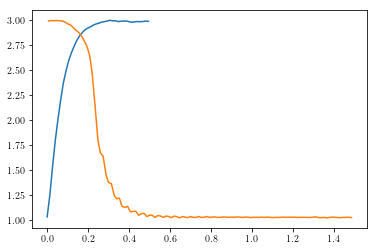

In [12]:
plt.plot(Time_op[0][0],Pressure_op[0][0])
plt.plot(Time_cl[0][0],Pressure_cl[0][0])

In [13]:
lim_op = 0
i = 0
while P_mean_op[i]/np.max(P_mean_op) < 0.99:
    i = i+1
lim_op = i

lim_cl = 0

i = 0
while P_mean_cl[i]/np.max(P_mean_op) > 1:
    i = i+1

lim_cl = i

while P_mean_cl[i]/np.min(P_mean_op) > 1.001:
    i = i+1

lim_cl_f = i

lim_op,lim_cl,lim_cl_f

(18, 0, 41)

In [25]:
Time_cl[3][0][lim_cl_f]

0.5530000000000008

In [15]:
def Open(X,a,b,c,d,e): 
    t = X
    #return ((a*t**3 + b*t**2 +c*t + d + e*t**4))
    return(a*(1-b*np.exp(c*t)))

In [16]:
def Close(X,a,b,c,d,e,f,g): 
    t = X
    #return ((a*t**3 + b*t**2 +c*t + d + e*t**4 + f*t**5 + *t**6))
    return((a*b+c*t**d)/(b+t**d))

In [17]:
DM = curve_fit(Open,(Time_op[i][0][0:lim_op]),P_mean_op[0:lim_op],maxfev = 10000000)
DM[0]

C:\Users\Guilherme\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


array([  3.09707479,   0.68785409, -13.37281935,   1.        ,
         1.        ])

In [18]:
CM = curve_fit(Close,(Time_cl[i][0][lim_cl:lim_cl_f]),P_mean_cl[lim_cl:lim_cl_f],maxfev = 100000000)
CM[0]

array([2.97991735e+00, 2.81225909e-05, 1.05394688e+00, 7.07884105e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [19]:
Time_cl[i][0][lim_cl:lim_cl_f]

array([0.007, 0.019, 0.033, 0.047, 0.059, 0.073, 0.087, 0.099, 0.113,
       0.127, 0.139, 0.154, 0.166, 0.18 , 0.193, 0.207, 0.219, 0.233,
       0.247, 0.259, 0.273, 0.287, 0.299, 0.313, 0.327, 0.339, 0.354,
       0.366, 0.38 , 0.393, 0.407, 0.419, 0.433, 0.447, 0.459, 0.473,
       0.487, 0.499, 0.514, 0.526, 0.54 ])

In [20]:
for i in range(len(A)-1):
    for j in range(len(Pressure_cl[i][0])):
        Data.write(j,i,Pressure_cl[i][0][j])
workbook.close()

AttributeError: 'Book' object has no attribute 'close'

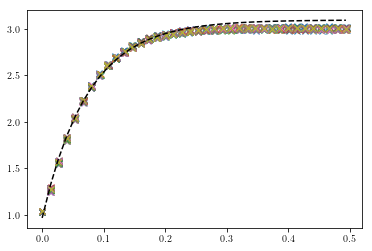

In [21]:
for i in range(len(A)-1):
    plt.plot(Time_op[i][0],Pressure_op[i][0],'x')
plt.plot(Time_op[i][0],Open((Time_op[i][0]),DM[0][0],DM[0][1],DM[0][2],DM[0][3],DM[0][4]),'k--')
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0])
#plt.plot(t,I,'k--')

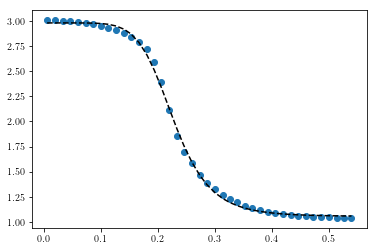

In [22]:
#for i in range(len(A)-1):
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0],'x')
plt.plot(Time_cl[i][0][lim_cl:lim_cl_f],P_mean_cl[lim_cl:lim_cl_f],'o')
plt.plot(Time_cl[i][0][lim_cl:lim_cl_f],Close((Time_cl[i][0][lim_cl:lim_cl_f]),CM[0][0],CM[0][1],CM[0][2],CM[0][3],CM[0][4],CM[0][5],CM[0][6]),'k--')
    #plt.plot(Time_cl[i][0],Pressure_cl[i][0])
#plt.plot(t,I,'k--')

In [219]:
def Perfil(f_v,DC):
    Tau = 1/f_v
    Tau_on = T*DC
    
    t_on = np.arange(0,Tau_on,Tau/100)
    t_off = np.arange(0,Tau-Tau_on,Tau/100)
    
    
    Pres = np.zeros(len(t_on)+len(t_off))
    
    for i in range(len(t_on)):
        if t_on[i] < 0.24:
            Pres[i] = Open((t_on[i]),DM[0][0],DM[0][1],DM[0][2],DM[0][3],DM[0][4])
        else:
            Pres[i] = Pres[i-1]
    A = i
    
    for i in range(0,len(t_off)):
        if t_off[i] < 0.56:
            Pres[i+A] = Close((t_off[i]),CM[0][0],CM[0][1],CM[0][2],CM[0][3],CM[0][4],CM[0][5],CM[0][6])
        else:
            Pres[i+A] = Pres[i+A-1]
    Pres[len(Pres)-1] = Pres[len(Pres)-2]
    
    j = 1

    while Pres[j+1]<Pres[j] or Pres[j]>1.1:
        j=j+1
        #print(j)
    
    t_f = t_off[i]
    print(i)

    
    return (Pres,t_f)

In [223]:
Pres = Perfil(0.5,0.5)

49


In [221]:
Pres[1]

1.68

In [155]:
Pres[i+1]<Pres[i],Pres[i] > 1.05

(False, True)

In [135]:
t = np.arange(0,2,2/100)

ValueError: x and y must have same first dimension, but have shapes (100,) and (2,)

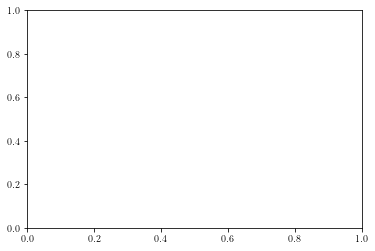

In [136]:
plt.plot(t,Pres)

inf
inf
inf
inf
inf
inf


C:\Users\Guilherme\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in double_scalars
  after removing the cwd from sys.path.


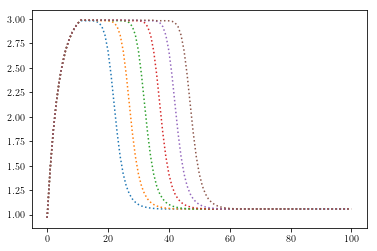

In [142]:
DC = np.arange(0.12,0.40,0.05)
for i in range(len(DC)):
    [A,B] = Perfil(0.5,DC[i])
    print(1/(2*B))
    plt.plot(A,':')

In [140]:
erro = np.zeros([len(A),len(Pressure_op[i][0])])
erro_cl = np.zeros([len(A),len(Pressure_cl[i][0])])
for i in range(len(A)-1):
    for j in range(len(Pressure_op[i][0])):
        erro[i][j] = abs(Pressure_op[i][0][j] - Open((Time_op[i][0][j]),DM[0][0],DM[0][1],DM[0][2],DM[0][3],DM[0][4]))/Pressure_op[i][0][j]*100
    for j in range(len(Pressure_cl[i][0])):
        erro_cl[i][j] = abs(Pressure_cl[i][0][j] - Close((Time_cl[i][0][j]),CM[0][0],CM[0][1],CM[0][2],CM[0][3],CM[0][4],CM[0][5],CM[0][6]))/Pressure_cl[i][0][j]*100

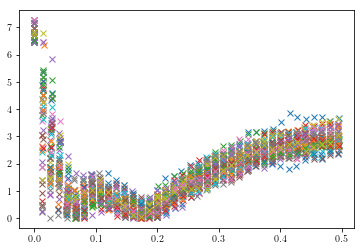

In [564]:
for i in range(len(A)-1):
    plt.plot(Time_op[i][0],erro[i],'x')

(0, 50)

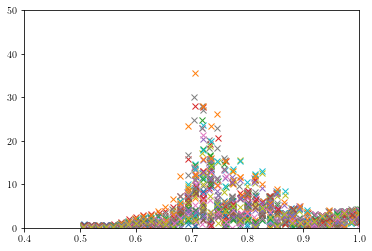

In [565]:
for i in range(len(A)-1):
    plt.plot(Time_cl[i][0],erro_cl[i],'x')
plt.xlim(0.4,1)
plt.ylim(0,50)

In [566]:
for i in range(np.int(N)-1):
    plt.plot(t[A:N_c+A],pd[N_c*i+A:N_c*(i+1)+A])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

In [567]:
for i in range(np.int(N)-1):
    plt.plot(t[A:N_c+A],mf[N_c*i+A:N_c*(i+1)+A])

TypeError: unsupported operand type(s) for +: 'int' and 'list'

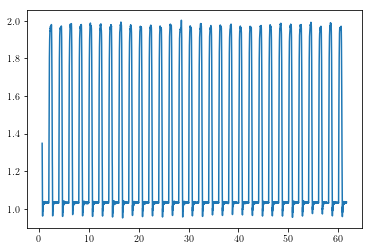

In [27]:
i = 0
plt.plot(t[i:4574],pd[i:4574])

75.0